In [110]:
import csv
import numpy as np
import pandas as pd
DS = pd.read_csv("MergedDS.csv")

In [10]:
DS.head()

,text_ID,start,end,object,value,unit,min,max,text
0,46809,0,6,RR,130.0,NaN,NaN,NaN,RR 130/80 mmHg.
1,45389,165,171,RR,110.0,NaN,NaN,NaN,"Kergelt liigkaaluline. Nahk, limaskestad taval..."
2,47482,0,5,RR,142.0,NaN,NaN,NaN,"RR142/89mmHg, HR 76 x min, p167cm, k89kg. EKG..."
3,53393,0,5,RR,143.0,NaN,NaN,NaN,"RR143/87mmHg, HR60 x min, p180cm, k93kg"
4,53571,0,6,RR,140.0,NaN,NaN,NaN,RR 140/74 mm Hg Cor fr. 62 UH uuringul kaela a...


In [11]:
len(DS)

185888

In [101]:
li = DS['text'].str.split().apply(len)

In [102]:
print("count    ", li.count())
print("mean     ",int(li.mean()))
print("std      ", int(li.std()))
print("Minimum  ", li.min())
print("25%      ", np.percentile(li, 25))
print("50%      ", li.median())
print("75%      ", np.percentile(li, 75))
print("max      ", li.max())

count     185888
mean      305
std       614
Minimum   1
25%       52.0
50%       128.0
75%       330.0
max       16850


Characters statistics

In [103]:
DS.text.apply(lambda x: len(x)).describe()

count    185888.000000
mean       2267.345504
std        4234.895677
min           4.000000
25%         431.000000
50%        1058.000000
75%        2443.000000
max      102602.000000
Name: text, dtype: float64

#### Take only sentences that has length less than 150 character

In [115]:
DS = DS[DS['text'].apply(len)<150]
len(DS[DS['text'].apply(len)<150])


16764

In [117]:
DS["text_ID"].nunique()

13643

In [118]:
DS.text.apply(lambda x: len(x)).describe()

count    16764.000000
mean        74.849797
std         40.413235
min          4.000000
25%         41.000000
50%         78.000000
75%        106.000000
max        149.000000
Name: text, dtype: float64

In [119]:
li2 = DS['text'].str.split().apply(len)

In [120]:
print("count    ", li2.count())
print("mean     ",int(li2.mean()))
print("std      ", int(li2.std()))
print("Minimum  ", li2.min())
print("25%      ", np.percentile(li2, 25))
print("50%      ", li2.median())
print("75%      ", np.percentile(li2, 75))
print("max      ", li2.max())

count     16764
mean      9
std       6
Minimum   1
25%       4.0
50%       9.0
75%       14.0
max       33


In [5]:
DS.head()

,text_ID,start,end,object,value,unit,min,max,text
0,46809,0,6,RR,130.0,NaN,NaN,NaN,RR 130/80 mmHg.
2,47482,0,5,RR,142.0,NaN,NaN,NaN,"RR142/89mmHg, HR 76 x min, p167cm, k89kg. EKG..."
3,53393,0,5,RR,143.0,NaN,NaN,NaN,"RR143/87mmHg, HR60 x min, p180cm, k93kg"
8,108715,0,6,RR,130.0,NaN,NaN,NaN,"RR 130/80 mmHg,fe reg 66 x min."
28,137141,45,52,RR,130.0,NaN,NaN,NaN,"EKS implantatsiooni järgselt enesetunne hea, R..."


In [6]:
new_df = pd.DataFrame(DS["text"].str.split().tolist(), index=DS.text_ID).stack()
new_df = new_df.reset_index([0, 'text_ID'])
new_df.columns = ['text_ID', 'word']
new_df["tag"]= np.NaN
myList= list(new_df.text_ID.unique())
for i in range(len(myList)):
    Original = DS.loc[DS["text_ID"] == myList[i]]
    words = new_df.loc[new_df["text_ID"] == myList[i]]
    for OriginalIndex, OriginalRow in Original.iterrows():
        for index, row in words.iterrows():
                if(str(Original["object"][OriginalIndex]) in str(words["word"][index])):
                    new_df["tag"][index] = "object"
                elif(str(int(Original["value"][OriginalIndex])) in str(words["word"][index])):
                    new_df["tag"][index] = "object"


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

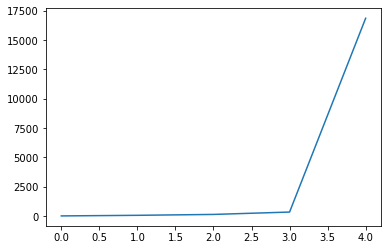

In [86]:
import matplotlib.pyplot as plt
result = plt.plot(myarray)
# plt.axvline(myarray.mean(), color='k', linestyle='dashed', linewidth=1)

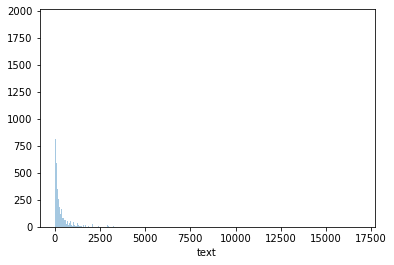

In [56]:
import seaborn as sns
sns.distplot(li,bins=np.arange(li.min(), li.max()+1),kde=False,hist_kws={"align" : "left"})
plt.show()


In [54]:
np.s(li)

16850

In [7]:
new_df.head(n=50)

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,NaN
3,47482,"RR142/89mmHg,",object
4,47482,HR,NaN
5,47482,76,NaN
6,47482,x,NaN
7,47482,"min,",NaN
8,47482,"p167cm,",NaN
9,47482,k89kg.,NaN


In [8]:
len(new_df)

157280

In [9]:
len(new_df.text_ID.unique())

13643

In [10]:
new_df["tag"].value_counts()

object    18108
Name: tag, dtype: int64

In [11]:
new_df["tag"].isna().sum()

139172

In [12]:
new_df.head()

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,NaN
3,47482,"RR142/89mmHg,",object
4,47482,HR,NaN


In [13]:
words = list(set(new_df["word"].values))
n_words = len(words);

In [14]:
n_words

27741

In [17]:
new_df.to_csv("ObjectSubset150SentenceLength.csv",index=False)